# <center> <font size = 24 color = 'steelblue'>**Speech Recognition**

<center><img src= 'https://drive.google.com/uc?export=view&id=1ACG-2N9lRygp6no9MJTJJYbeAuuOiUtW' height = 500, width = 800>

<div class="alert alert-block alert-info">
    
<font size = 4>

**By the end of this notebook you will be able to:**

* Learn to preprocess audio files
* Understand audio features
* Identify methods of speech recognition

# <a id= 's0'>
<font size = 4>
    
**Table of contents:**<br>
[1. Data description](#s1)<br>
[2. Preprocessing of the audio files](#s2)<br>
[3. General audio features exploration](#s3)<br>
[4. Speech analysis](#s4)<br>
[5. Sentiment analysis](#s5)

###### <a id = 's1'>
<font size = 10 color = 'midnightblue'> **Data Description**

<div class="alert alert-block alert-success">
<font size = 4>
    
**Audio files used in this analysis are available in Wikimedia:**

- VOA News Report: "FIFA to Re-Examine Video Replays After World Cup Referee Mistakes" https://commons.wikimedia.org/wiki/File:2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.ogg
- Aldi speaking Bible verse in Bahasa Indonesia https://commons.wikimedia.org/wiki/File:Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.ogg

<font size = 5 color = seagreen > **Load the libraries**

In [1]:
# Import generic libraries
!pip install pydub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment

[top](#s0)

###### <a id = 's2'>
<font size = 10 color = 'midnightblue'> **Preprocessing**

<div class="alert alert-block alert-success">
<font size = 4>
    
- For processing in most Python audio-processing libraries, audio files typically need to be in waveform (.wav) format.
- WAV is preferred due to its lossless attributes, unlike compressed formats such as mp3/m4a.
- Hence, it is recommended to convert your audio file to WAV before analysis if it's not already in that format.
- In Python, audio file conversion is simplified by the pydub package.
- To achieve this, create an AudioSegment instance from the input file and utilize the "export" function to generate the desired output file.
</div>

In [ ]:
#pwd()

<font size = 6 color = pwdrblue> **Creating a clone to enable `ogg` to `wav` conversion**

In [3]:
!git clone https://git.ffmpeg.org/ffmpeg.git ffmpeg

Resolving deltas: 100% (598479/598479), done.
fatal: destination path 'ffmpeg' already exists and is not an empty directory.


In [4]:
from pydub import AudioSegment

# Load the OGG file
ogg_file = "2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.ogg"
audio = AudioSegment.from_file(ogg_file, format="ogg")

# Export as WAV
wav_file = "2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav"
audio.export(wav_file, format="wav")

print(f"Conversion complete. WAV file saved at {wav_file}")

Conversion complete. WAV file saved at 2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav


In [5]:
ipd.Audio("2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav")

[top](#s0)

###### <a id = 's3'>
<font size = 10 color = 'midnightblue'> **General audio features explorations**

<font size = 5 color = seagreen> **Amplitude**

In [6]:
import librosa
import librosa.display

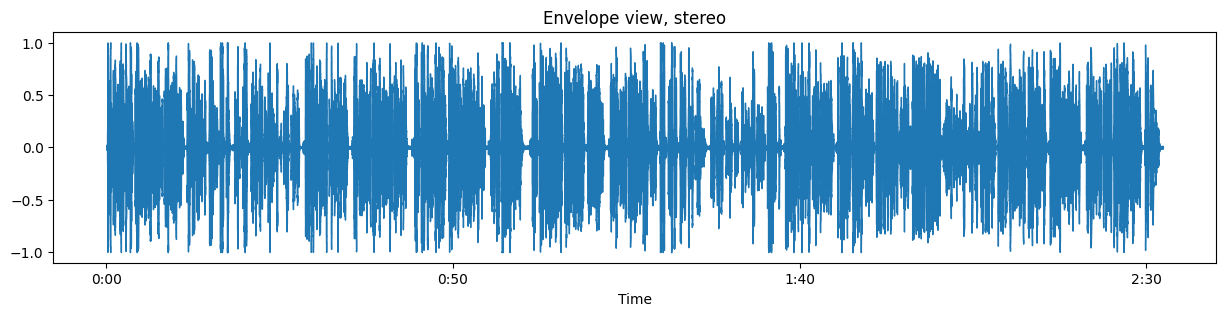

In [7]:
y, sr = librosa.load('2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav', mono=False)

fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.waveshow(y, sr=sr, ax=ax)

ax.set(title='Envelope view, stereo')
ax.label_outer()

plt.show()

<font size = 5 color = seagreen> **Frequency**

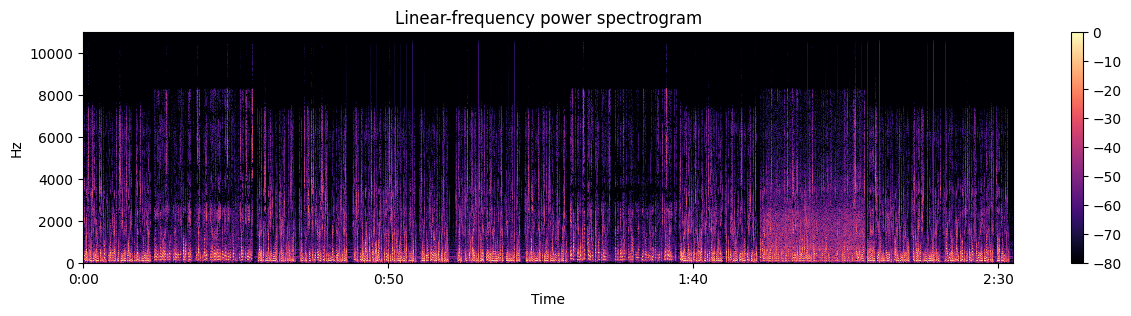

In [8]:
# Load audio file to Librosa
y, sr = librosa.load('2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav')

# Converts data into short term Fourier transform.
# STFT converts signals such that we can know the amplitude of the given frequency at a given time
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display spectogram
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr)
ax.set(title='Linear-frequency power spectrogram')
ax.label_outer()

plt.colorbar()

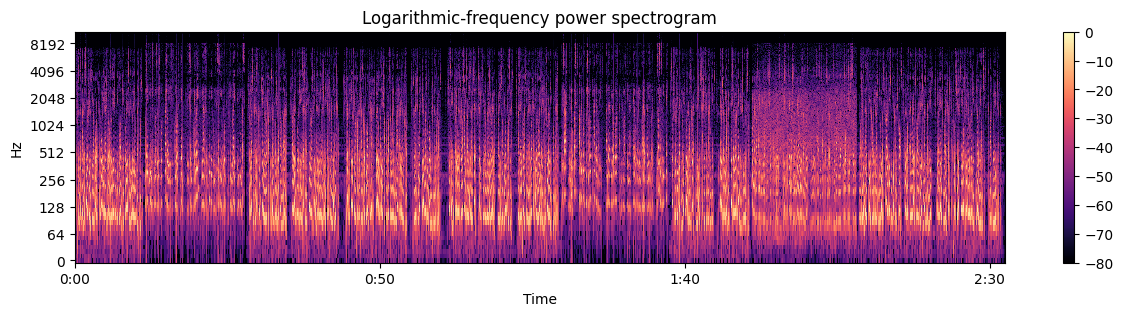

In [9]:
fig, ax = plt.subplots(figsize=(15, 3))
img = librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
ax.set(title='Logarithmic-frequency power spectrogram')
ax.label_outer()

plt.colorbar()

[top](#s0)

###### <a id = 's4'>
<font size = 10 color = 'midnightblue'> **Speech Analysis**

In [10]:
!pip3 install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.1 MB/s eta 0:00:00


<font size = 4 color = seagreen><b>Speech recognition</b>

<div class="alert alert-block alert-success">
<font size = 4>
    
- Input the audio file(s) into a predefined engine for textual transcription.
- Utilize the speech recognition library in python for this transcription task.
- The library supports various engines, including CMU Sphinx, Google Cloud Speech API, Microsoft Bing Voice Recognition, and IBM Speech to Text.
- It's important to note that certain engines may require API tokens.
- For this project, **Google Speech Recognition** is used with the default API key.
</div>

<font size = 4 color = seagreen> **Key Features of Speech Recognition:**

<div class="alert alert-block alert-success">
<font size = 4>
    
> The Speech Recognition library encompasses a Recognizer class, equipped with a set of built-in functions for configuring speech recognition settings and accessing features.
    
- To begin, we import the library and configure the Recognizer. <br>
- Subsequently, we import the audio file intended for transcription.

In [11]:
import speech_recognition as sr

# Set up recognizer
r = sr.Recognizer()
r.energy_threshold = 300

# Import Audio data
test_audio = sr.AudioFile('2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav')
with test_audio as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source)

r.recognize_google(audio, show_all=True)

{'alternative': [{'transcript': "mistakes are deplorable and the board of the International Football Association that makes the laws of the game will reconsider the use of video replay technology concerning the International Football Association the discussion on technology when the business meeting of the board in July is meeting in Wells Fargo's in the second game officials missed a clear off side against Argentina's 1:31",
   'confidence': 0.44354144},
  {'transcript': "mistakes are deplorable and the board of the International Football Association that makes the laws of the game will reconsider the use of video replay technology concerning the International Football Association the discussion on technology when the business meeting of the board in July is meeting in Wells Fargo's in the second game officials missed a clearer off side against Argentina's 1:31",
   'confidence': 0.44354144},
  {'transcript': "mistakes are deplorable and the bored of the International Football Associa

<div class="alert alert-block alert-success">
<font size = 4>

- Transcription can now be directly performed using the recognize_google function, which takes the audio file as input and produces the transcription as output.
- However, depending on the audio file quality, several other functionalities can be employed to improve the audio file, thus resulting in enhanced transcription.
- If unnecessary content is present in your audio file that does not require transcription, the duration and offset variables in the record function can be utilized to specify the particular segment of the audio file to transcribe.
- In the case of a noisy audio file, the adjust_for_ambient_noise function can be employed to adjust the energy threshold for ambient noise levels. This calibration enables the noise to be disregarded, allowing the recognizer to concentrate on the actual speech.
- The code for speech recognition on the VOA News audio file is provided below.

In [12]:
# Import Audio data

test_audio2 = sr.AudioFile('2010-06-29_VOA_News_report_-_FIFA_to_Re-Examine_Video_Replays_After_World_Cup_Referee_Mistakes.wav')
with test_audio2 as source2:
    audio2 = r.record(source2, duration=60)
    audio3 = r.record(source2, duration=60)
    audio4 = r.record(source2)

<div class="alert alert-block alert-success">
<font size = 4>
    
- Multiple transcription results may be generated by different recognition techniques within the Speech Recognition engine.
- The Recognizer class automatically selects the result with the highest confidence score.
- To examine other transcription results, the recognize_google function can include the show_all=True variable.
</div>

In [13]:
text_audio = r.recognize_google(audio2) + " " + r.recognize_google(audio3) + " " + r.recognize_google(audio4)
text_audio

"FIFA president Sepp blatter says any referee mistakes are deplorable and the board of the International Football Association that makes the laws of the game will reconsider the use of video replay technology concerning the International Football Association the discussion on technology officiating mistakes Sunday during the round of 16 matches between England and Germany and between Argentina and Mexico in the first match in in the second game officials missed a clear off site against Argentina's Carlos Tevez whose header gave his team an early one little lead over Mexico the argentine's 131 and also Advanced bladder said he apologized to England and Mexico and that FIFA was already studying how to improve refereeing or match control in high level competitions and we are going forward call for the introduction of video replays to allow referees to review controversial calls others have called for adding more officials to the one referee and two linesman currently in use the bladder an

<font size = 5 color = seagreen> <b>Add punctuator</b>

In [14]:
!pip install deepmultilingualpunctuation

In [15]:
from deepmultilingualpunctuation import PunctuationModel

In [16]:
model = PunctuationModel()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/892 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="none"` instead.
  warnings.warn(


In [17]:
text_audio_punc = model.restore_punctuation(text_audio)
text_audio_punc

"FIFA president, Sepp blatter, says any referee mistakes are deplorable and the board of the International Football Association that makes the laws of the game will reconsider the use of video replay technology. concerning the International Football Association, the discussion on technology officiating mistakes. Sunday during the round of 16 matches between England and Germany and between Argentina and Mexico in the first match. in in the second game, officials missed a clear off site against Argentina's Carlos Tevez, whose header gave his team an early, one little lead over Mexico. the argentine's 131 and also Advanced bladder said he apologized to England and Mexico and that FIFA was already studying how to improve refereeing or match control in high level competitions. and we are going forward. call for the introduction of video replays to allow referees to review controversial calls. others have called for adding more officials to the one referee and two linesman currently in use. 

<font size = 5 color = seagreen> <b>Recognition on non-english language</b>

<div class="alert alert-block alert-success">
<font size = 4>
    
- Speech Recognition supports recognition from non-English languages.
- In such cases, include the language="id-ID" variable within the recognize_google function.
</div>

In [18]:
raw_file = AudioSegment.from_file(file="Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.ogg", format="ogg")
raw_file.export(out_f="Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.wav", format="wav")

wav_file = AudioSegment.from_file(file="Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.wav", format="wav")

In [19]:
# Set up recognizer
r = sr.Recognizer()
r.energy_threshold = 300

# Import Audio data
test_audio = sr.AudioFile('Aldi_-_Indonesian_language_-_Bible_Verse_John_3-16.wav')
with test_audio as source:
    r.adjust_for_ambient_noise(source)
    audio = r.record(source)

r.recognize_google(audio, language="id-ID", show_all=True)

{'alternative': [{'transcript': 'ayat 16 karena begitu besar kasih Allah akan dunia ini sehingga Ia telah mengaruniakan anaknya yang tunggal supaya setiap orang yang percaya kepadaNya tidak binasa melainkan beroleh hidup yang kekal',
   'confidence': 0.91895229},
  {'transcript': 'ayat 1-6 karena begitu besar kasih Allah akan dunia ini sehingga Ia telah mengaruniakan anaknya yang tunggal supaya setiap orang yang percaya kepadaNya tidak binasa melainkan beroleh hidup yang kekal'}],
 'final': True}

In [20]:
text_audio_id = r.recognize_google(audio, language="id-ID")
text_audio_id

'ayat 16 karena begitu besar kasih Allah akan dunia ini sehingga Ia telah mengaruniakan anaknya yang tunggal supaya setiap orang yang percaya kepadaNya tidak binasa melainkan beroleh hidup yang kekal'

[top](#s0)

###### <a id = 's5'>
<font size = 10 color = 'midnightblue'> <b>Sentiment Analysis using VADER

<div class="alert alert-block alert-info">
<font size = 4>
    
<center><b>Sentiment analysis using VADER library has already been covered in previous chapters.

In [21]:
import nltk
nltk.download("punkt")
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [23]:
print(sid.polarity_scores(text_audio_punc))

{'neg': 0.059, 'neu': 0.881, 'pos': 0.06, 'compound': 0.0516}


In [24]:
print(sid.polarity_scores(text_audio_id))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[top](#s0)